# Static Ordinal Regression with Toy Dataset using TensorFlow
---------

## Imports

In [1]:
# General
import sys, os
import autograd.numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
# Local
sys.path.append(os.path.abspath(os.path.join('../src')))
from clm_sklearn import OrdinalRegression, plot_model

## Ordinal Regression Testing

### Toy Data Import

In [2]:
cresent_df = pd.read_csv('./toydata/crescent_shapes_4_labels.csv')
cresent_df

,x1,x2,label
0,0.941574,0.505779,0.0
1,-1.092763,-0.005928,0.0
2,0.439351,-0.509177,0.0
3,0.187745,0.076755,0.0
4,0.003034,-0.123461,0.0
...,...,...,...
2480,3.568087,0.585072,3.0
2481,6.732316,-0.126761,3.0
2482,6.684452,-0.217130,3.0
2483,6.921550,-1.518566,3.0


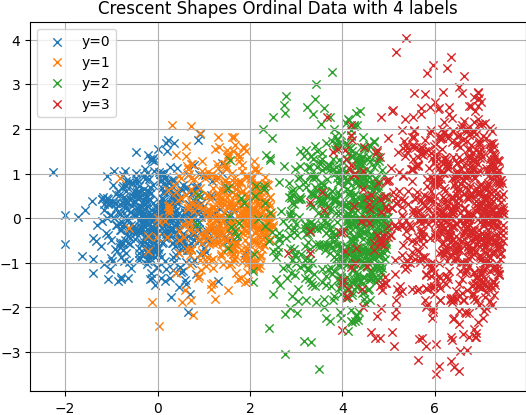

In [3]:
from IPython.display import Image
Image(filename='./toydata/crescent_shapes_4_labels.png') 

First, let's split the data into an X and y dataframe, casting the target ordinal classes to integer values. Optionally, we can scale the raw data using either the `MinMaxScaler` or `StandardScaler`. For the sake of this exercise, we will not, but the lines of code are uncommented if you would like to try it yourself.

In [4]:
# Scaling
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)

# Data
X = cresent_df[['x1', 'x2']].values
y = cresent_df['label'].values.astype(int)
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (2485, 2)
[[ 9.41573847e-01  5.05778613e-01]
 [-1.09276303e+00 -5.92827714e-03]
 [ 4.39350881e-01 -5.09177383e-01]
 ...
 [ 6.68445210e+00 -2.17130055e-01]
 [ 6.92155034e+00 -1.51856577e+00]
 [ 6.84851267e+00  9.15530483e-01]]
y: (2485,)
[0 0 0 ... 3 3 3]


### Train Model

Using the model is similar to using any model class in sklearn. Simply follow the following steps:
1. Instantiate the model with the desired hyperparameters
2. Fit the model using the `fit()` method on desired dataset and targets
3. Predict outcomes using the `predict()` method using desired dataset.

In this case, we are training and evaluating the model with the same dataset (not the best practice). Feel free to leave out a pertion of the data to evaluate on a testing set if desired.

In [5]:
# Model training
clf = OrdinalRegression(noise_stdev= 1, C=1, random_state=10)
clf.fit(X, y)

# Model prediction
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

[[4.07538121e-01 5.90811148e-01 1.65103110e-03 1.00000020e-07]
 [9.99886062e-01 1.14138368e-04 1.00003498e-07 1.00000000e-07]
 [7.76387086e-01 2.23571005e-01 4.22084089e-05 1.00000000e-07]
 ...
 [1.00000000e-07 1.00000000e-07 2.90083972e-04 9.99710116e-01]
 [1.00000000e-07 1.00000000e-07 5.74082479e-05 9.99942792e-01]
 [1.00000000e-07 1.00000000e-07 7.56660706e-05 9.99924534e-01]]
[1 0 0 ... 3 3 3]


### Evaluate Model

We can use the `plot_model()` function to visualize a heatmap of the probability scores for any location in the dimensions of the dataset. This helps us also visualize the cutpoints of the CLM, observed by regions of low confidence.

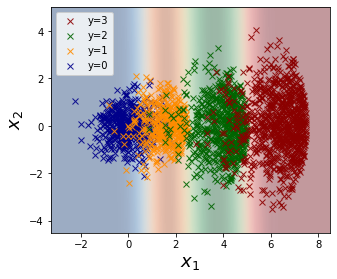

In [6]:
plot_model(clf)

A confusion matrix also helps determine what proportion of the ordinal classes the model predicts correctly and where it might be struggling.

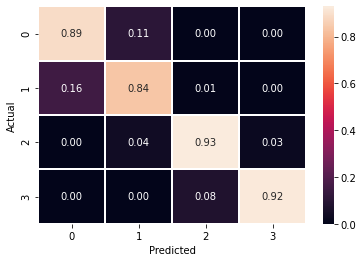

In [7]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

**Discussion**:

It seems like the model struggles the most with distinguishing between the first and second ordinal class, which makes sense since these classes have the highest overlap.